In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


1)load the dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Replace the path below with the actual path inside your Google Drive
df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

print(df.head())





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    W

2)Pre-process the data:

In [ ]:
print("\nMissing values:\n", df.isnull().sum())
print(       )
# Drop ID columns (not useful for prediction)
df.drop(columns=['Customer ID', 'Property ID'], inplace=True, errors='ignore')

# Rename target column for easier access
df.rename(columns={'Loan Sanction Amount (USD)': 'LoanAmount'}, inplace=True)

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])
print("Any missing values left?\n", df.isnull().sum())





Missing values:
 Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

Any missing values left?
 Name                           0
Gender                         0
Age         

encode categorical variables

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Encoded columns:")
print(df.select_dtypes(include=['int64', 'float64']).head())



Encoded columns:
    Name  Gender  Age  Income (USD)  Income Stability  Profession  \
0   9529       0   56   1933.050000                 1           7   
1   1304       1   32   4952.910000                 1           7   
2  24595       0   65    988.190000                 0           3   
3  29860       0   65   2630.574417                 0           3   
4    190       0   31   2614.770000                 1           7   

   Type of Employment  Location  Loan Amount Request (USD)  \
0                  14         1                   72809.58   
1                   8         1                   46837.47   
2                   8         1                   45593.04   
3                   8         0                   80057.92   
4                   6         1                  113858.89   

   Current Loan Expenses (USD)  ...  Dependents  Credit Score  \
0                       241.08  ...    3.000000        809.44   
1                       495.81  ...    1.000000        780.40   


In [ ]:
print("Processed DataFrame:")
print(df.head())

print("\nData types after encoding:")
print(df.dtypes)


Processed DataFrame:
    Name  Gender  Age  Income (USD)  Income Stability  Profession  \
0   9529       0   56   1933.050000                 1           7   
1   1304       1   32   4952.910000                 1           7   
2  24595       0   65    988.190000                 0           3   
3  29860       0   65   2630.574417                 0           3   
4    190       0   31   2614.770000                 1           7   

   Type of Employment  Location  Loan Amount Request (USD)  \
0                  14         1                   72809.58   
1                   8         1                   46837.47   
2                   8         1                   45593.04   
3                   8         0                   80057.92   
4                   6         1                  113858.89   

   Current Loan Expenses (USD)  ...  Dependents  Credit Score  \
0                       241.08  ...    3.000000        809.44   
1                       495.81  ...    1.000000        780.40

Normalize or Standardize the Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop("LoanAmount", axis=1)
y = df["LoanAmount"]

# Apply standardization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("Scaled Features (first 5 rows):")
print(X_scaled.head())

print("\nMeans after scaling (should be ~0):")
print(X_scaled.mean())

print("\nStandard deviations after scaling (should be ~1):")
print(X_scaled.std())


Scaled Features (first 5 rows):
       Name    Gender       Age  Income (USD)  Income Stability  Profession  \
0 -0.631679 -1.007092  0.991451     -0.067276          0.305833    0.834973   
1 -1.581420  0.992958 -0.504355      0.223990          0.305833    0.834973   
2  1.107993 -1.007092  1.552379     -0.158409         -3.269763   -0.686548   
3  1.715943 -1.007092  1.552379      0.000000         -3.269763   -0.686548   
4 -1.710054 -1.007092 -0.566680     -0.001524          0.305833    0.834973   

   Type of Employment  Location  Loan Amount Request (USD)  \
0            1.569338  0.142149                  -0.269027   
1            0.027732  0.142149                  -0.705269   
2            0.027732  0.142149                  -0.726171   
3            0.027732 -1.762481                  -0.147279   
4           -0.486137  0.142149                   0.420461   

   Current Loan Expenses (USD)  ...  Expense Type 2    Dependents  \
0                    -0.660989  ...       -1.433524

3. Perform Exploratory Data Analysis (EDA) to understand the distributions and relationships in the dataset.

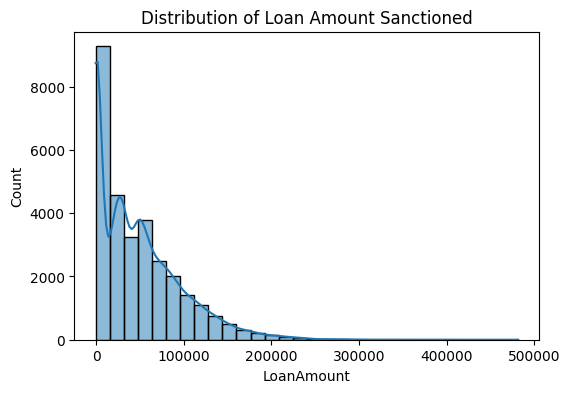

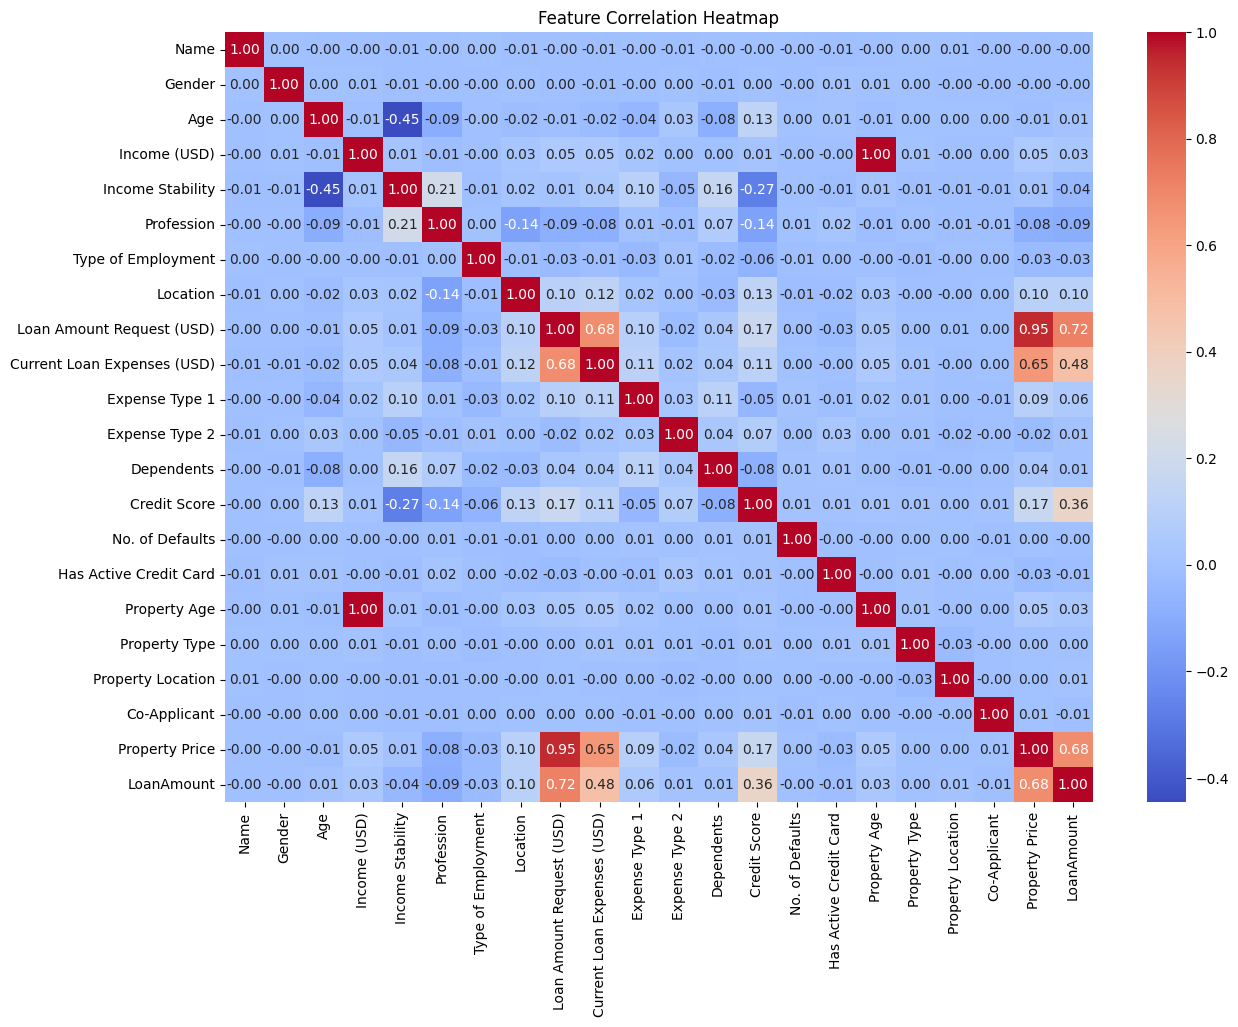

In [ ]:
# Histogram of Target
plt.figure(figsize=(6, 4))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Distribution of Loan Amount Sanctioned")
plt.show()
print("  ")
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


5)feature engineering technique

In [ ]:
# Separate target and features
X = df.drop("LoanAmount", axis=1)
y = df["LoanAmount"]

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


5. Split the dataset into training, testing, and validation sets.


In [ ]:
# Split into Train / Validation / Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


6. Train the Linear Regression model on the training set.


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

7. Evaluate the model on the testing and validation sets.
8. Measure performance using metrics such as Mean Squared Error (MSE), Mean Absolute
Error (MAE), and R2
score.


In [ ]:
def evaluate_model(X, y, dataset_name="Set"):
    preds = lr.predict(X)
    print(f"\nEvaluation on {dataset_name}:")
    print("MSE :", mean_squared_error(y, preds))
    print("MAE :", mean_absolute_error(y, preds))
    print("R2  :", r2_score(y, preds))
    return preds

# Evaluate
y_train_pred = evaluate_model(X_train, y_train, "Training")
y_val_pred = evaluate_model(X_val, y_val, "Validation")
y_test_pred = evaluate_model(X_test, y_test, "Test")



Evaluation on Training:
MSE : 978695149.98226
MAE : 21762.151156541575
R2  : 0.5774296655691908

Evaluation on Validation:
MSE : 944840047.3642465
MAE : 21545.454044325597
R2  : 0.5826202378187786

Evaluation on Test:
MSE : 974918970.1309869
MAE : 21903.710601981522
R2  : 0.567378940734545


9. Visualize the results:
• Plot predicted vs actual values
• Visualize feature importance or coefficients

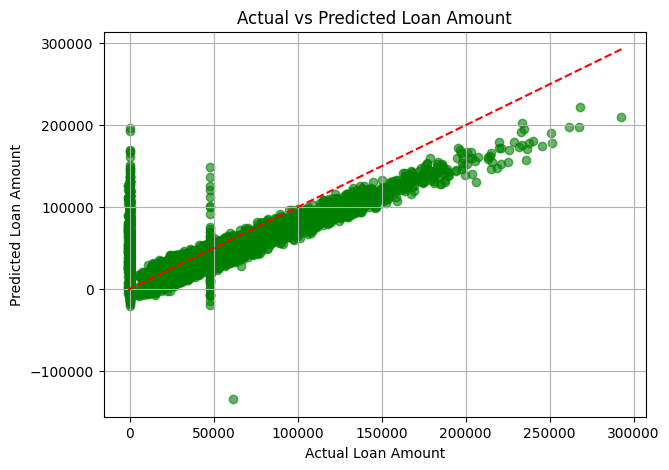

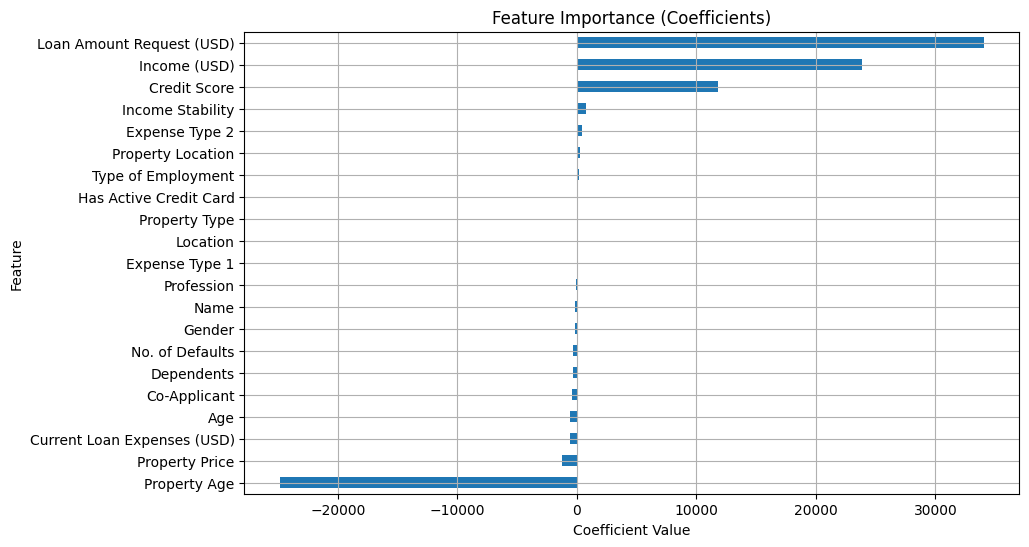

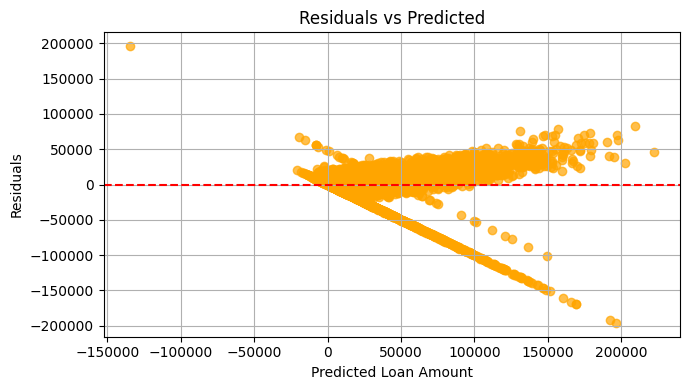

In [ ]:
# Predicted vs Actual
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6,color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.grid(True)
plt.show()
print("  \n")
# Feature Importance
coefs = pd.Series(lr.coef_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh')
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()
print("  ")

residuals = y_test - y_test_pred
plt.figure(figsize=(7, 4))
plt.scatter(y_test_pred, residuals, color='orange', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Loan Amount")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

